<a href="https://colab.research.google.com/github/ZemelakGoraga/Text_Analysis/blob/main/Analysis_of_Tweets_from_US_Capitol_Riots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project title:** Analyzing Public Discourse and Sentiment in Tweets about the US Capitol Riots (Jan 6, 2021)

**Project objective:**

The primary goal of this project is to gain actionable insights into the public sentiment, engagement trends, and key discussion topics surrounding the US Capitol Riots through analysis of tweets on social media. By understanding how users perceive and engage with this pivotal event, our aim is to provide valuable intelligence to inform decision-making for public relations, crisis communication strategies, and sentiment monitoring. These insights will assist in gauging public sentiment shifts over time, identifying influential voices, and comprehending the most impactful topics, ultimately enabling organizations to tailor their communication strategies and responses in line with public sentiment and interests.


**Questions to address:**

Question 1: What are the prevalent sentiments expressed in tweets about the US Capitol Riots?

Question 2: What are the most frequently discussed topics or hashtags associated with the US Capitol Riots in tweets?

Question 3: How does the sentiment of tweets about the US Capitol Riots correlate with engagement metrics, such as retweets and likes?


In [2]:
# from the Kaggle account settings page.
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelak","key":"08c8054de361c9898298da09f2007bec"}'}

In [110]:
# Next
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Aug 22 18:55 kaggle.json


In [111]:
# Next
# Next, install the Kaggle API client.
!pip install -q kaggle

# Next
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


# Next

# List a given datasets

!kaggle datasets download -d codebreaker619/80000-tweets-from-us-capitol-riotsjan-6-2021


80000-tweets-from-us-capitol-riotsjan-6-2021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [112]:
# unzip the different data files
# There is one .csv file in the following zip file

import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/80000-tweets-from-us-capitol-riotsjan-6-2021.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)

tweets.csv


In [114]:
# Download a specific table to work with
# Here, I will download the following table, which contains imported live animals and products:
#  Table to download: "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv", and save it as df

import pandas as pd
from zipfile import ZipFile

# Specify the CSV file to read from the ZIP archive
csv_file_to_read = "tweets.csv"

# Read the ZIP archive
with ZipFile("/content/80000-tweets-from-us-capitol-riotsjan-6-2021.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')

['tweets.csv']


In [115]:
df.head()

,tweet_id,text,query,user_id,user_name,follower_count,user_tweet_count,likes,retweets,location_name,latitude,longitude,user_location,date
0,1346863072435179520,we can adjust by population to get crude exces...,death rates,1101487206840057856,nick stripe,12936,1577,255,108,NaN,NaN,NaN,NaN,2021-01-06
1,1346817043232919555,turning to labour or remainers like what would...,death rates,234694571,femi,290982,75187,877,116,NaN,NaN,NaN,NaN,2021-01-06
2,1346862193451692034,numbers of deaths are affected by population s...,death rates,1101487206840057856,nick stripe,12936,1577,213,75,NaN,NaN,NaN,NaN,2021-01-06
3,1346969461190848516,here is a list of governors who preside over s...,death rates,1346952467003568129,NaN,2,120,0,7612,NaN,NaN,NaN,NaN,2021-01-06
4,1346969317569687554,convince me with facts on death rates and infe...,death rates,885891622919184384,NaN,11552,36252,2,0,NaN,NaN,NaN,NaN,2021-01-06


In [116]:
df.shape

(82309, 14)

In [195]:
df.columns

Index(['tweet_id', 'text', 'query', 'user_id', 'user_name', 'follower_count',
       'user_tweet_count', 'likes', 'retweets', 'location_name', 'latitude',
       'longitude', 'user_location', 'date', 'entities', 'sentiment',
       'predicted_sentiment', 'cleaned_text'],
      dtype='object')

In [196]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming you've already loaded the dataset and named it 'df'

# Drop rows with missing text
df = df.dropna(subset=['text'])



In [197]:
# Initialize spaCy for NER and sentiment analysis
nlp = spacy.load("en_core_web_sm")

# Function to extract entities and sentiments
def extract_entities_sentiments(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    sentiment = doc.sentiment
    return entities, sentiment



In [154]:

# Apply the extract_entities_sentiments function to each rows
df[['entities', 'sentiment']] = df['cleaned_text'].apply(extract_entities_sentiments).apply(pd.Series)



In [198]:
df.columns

Index(['tweet_id', 'text', 'query', 'user_id', 'user_name', 'follower_count',
       'user_tweet_count', 'likes', 'retweets', 'location_name', 'latitude',
       'longitude', 'user_location', 'date', 'entities', 'sentiment',
       'predicted_sentiment', 'cleaned_text'],
      dtype='object')

In [145]:
df['entities'].head()

0    [(2020, DATE), (1940, DATE), (2020, DATE), (19...
1                                    [(one, CARDINAL)]
2    [(the first decade of this century, DATE), (th...
3    [(ron desantis, PERSON), (1 1 murphy, QUANTITY...
4                                                   []
Name: entities, dtype: object

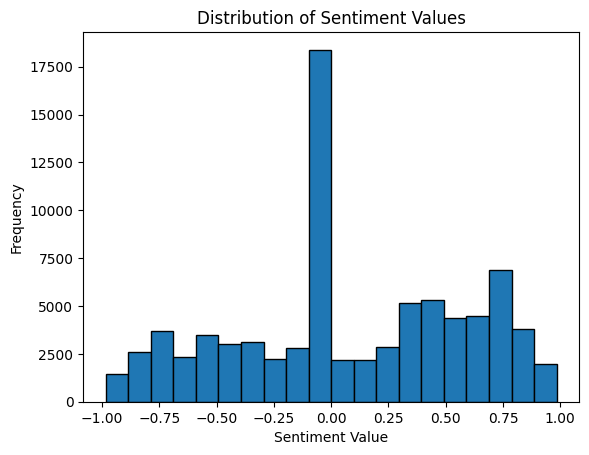

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming you've already loaded the dataset and named it 'df'

# Drop rows with missing text
df = df.dropna(subset=['text'])

# Assume 'sentiment' column contains sentiment values
sentiment_values = df['sentiment']

# Create a histogram of sentiment values
plt.hist(sentiment_values, bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Values')
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')
plt.show()


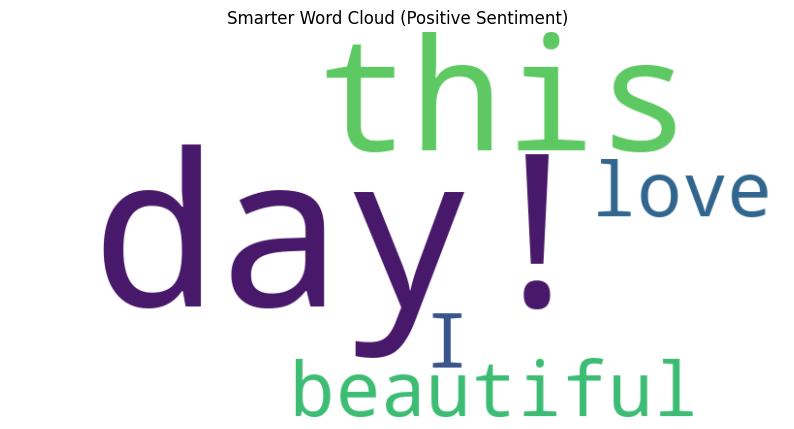

In [200]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample data with sentiment labels and text
data = [
    {"sentiment": "positive", "text": "I love this beautiful day!"},
    {"sentiment": "negative", "text": "This is a terrible experience."},
    {"sentiment": "neutral", "text": "The weather is neutral today."}
]

# Calculate log likelihood for each word in the positive sentiment text corpus
positive_text = " ".join([entry["text"] for entry in data if entry["sentiment"] == "positive"])
positive_words = positive_text.split()
positive_word_counts = dict((word, positive_words.count(word)) for word in set(positive_words))

# Create a word cloud with filtered words based on log likelihood
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Smarter Word Cloud (Positive Sentiment)')
plt.show()


In [203]:
df.head()

,tweet_id,text,query,user_id,user_name,follower_count,user_tweet_count,likes,retweets,location_name,latitude,longitude,user_location,date,entities,sentiment,predicted_sentiment,cleaned_text
0,1346863072435179520,we can adjust by population to get crude exces...,death rates,1101487206840057856,nick stripe,12936,1577,255,108,NaN,NaN,NaN,NaN,2021-01-06,"[(year, DATE)]",-0.9100,negative,adjust population get crude excess death rates...
1,1346817043232919555,turning to labour or remainers like what would...,death rates,234694571,femi,290982,75187,877,116,NaN,NaN,NaN,NaN,2021-01-06,"[(one, CARDINAL)]",-0.6808,negative,turning labour remainers like would different ...
2,1346862193451692034,numbers of deaths are affected by population s...,death rates,1101487206840057856,nick stripe,12936,1577,213,75,NaN,NaN,NaN,NaN,2021-01-06,"[(first decade century, DATE), (spanish, NORP)]",-0.9246,negative,numbers deaths affected population size also c...
3,1346969461190848516,here is a list of governors who preside over s...,death rates,1346952467003568129,NaN,2,120,0,7612,NaN,NaN,NaN,NaN,2021-01-06,"[(ron desantis, PERSON), (cuomo baker, PERSON)...",-0.5423,positive,list governors preside states higher deathperm...
4,1346969317569687554,convince me with facts on death rates and infe...,death rates,885891622919184384,NaN,11552,36252,2,0,NaN,NaN,NaN,NaN,2021-01-06,[],-0.4404,neutral,convince facts death rates infection rates


In [259]:
df.columns

Index(['tweet_id', 'text', 'entities', 'sentiment', 'predicted_sentiment'], dtype='object')

In [209]:
from textblob import TextBlob

# Load the dataset
# Assuming you've already loaded the dataset and named it 'df'

# Initialize TextBlob sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return 'positive' if sentiment > 0 else 'negative' if sentiment < 0 else 'neutral'

# Apply sentiment analysis to the dataset
df['predicted_sentiment'] = df['text'].apply(get_sentiment)

# Data analysis and visualization
# Your visualization and analysis code here


In [213]:
df['predicted_sentiment'].head()

0    negative
1    negative
2    negative
3    positive
4     neutral
Name: predicted_sentiment, dtype: object

In [214]:
true_sentiment.head()

27000   -0.3434
23924    0.0772
23400   -0.6854
9687    -0.5638
74498    0.0258
Name: sentiment, dtype: float64

In [185]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [186]:
# generate sentiment from df dataset
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
# Assuming you've already loaded the dataset and named it 'df'

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores using VADER
def get_sentiment_score(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

# Apply the function to the 'cleaned_text' column and create a new 'sentiment' column
df['sentiment'] = df['cleaned_text'].apply(get_sentiment_score)

# Display the first few rows of the DataFrame
print(df[['cleaned_text', 'sentiment']].head())


                                        cleaned_text  sentiment
0  adjust population get crude excess death rates...    -0.9100
1  turning labour remainers like would different ...    -0.6808
2  numbers deaths affected population size also c...    -0.9246
3  list governors preside states higher deathperm...    -0.5423
4         convince facts death rates infection rates    -0.4404


In [183]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [150]:
# Assuming you've loaded the dataset and named it 'df'

# Inspect the 'sentiment' column
print(df['text'].value_counts())


in 2017 georgias next us senator confronted a dark chapter in our nations story by standing for office now jon ossoff will stand for all of georgia in the fight for healthcare jobs justice and our nation will be all the better for having him congratulations                  2137
someones boyfriend is most defooo planning how to make a quarantine valentines special whilst other peoples boyfriends are gonna say their hands were tied lmao                                                                                                                     990
unemployment sucks life out of people if youre out there without a source of income or youre earning too little to cover your needs i pray you get something youve always desired and things turn around for the positive                                                           798
ahgases teaching antis how stock market works w their degrees legends open the schools they said got7                                                           

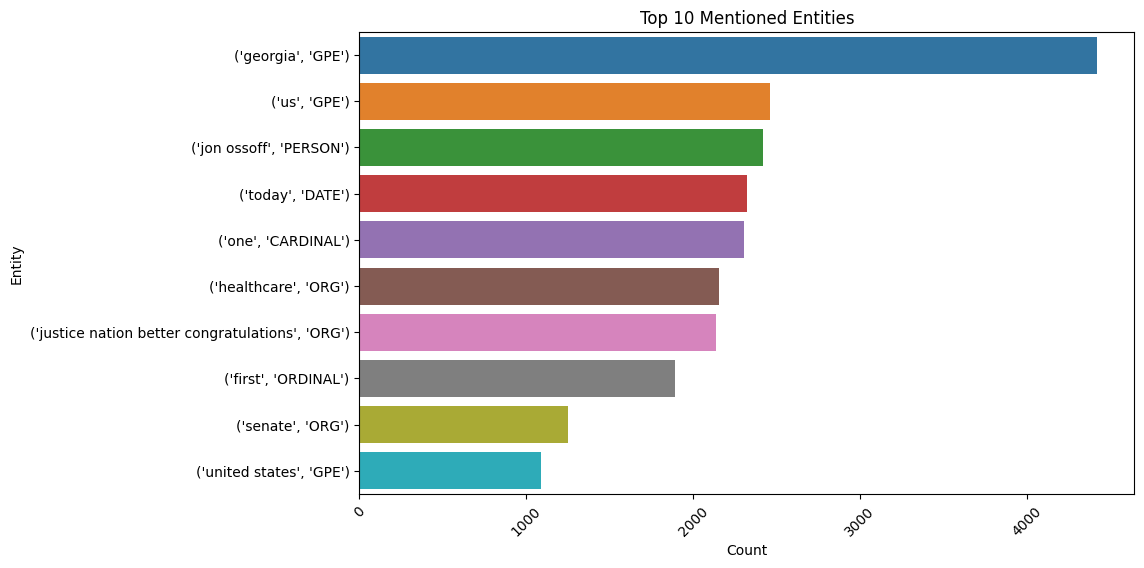

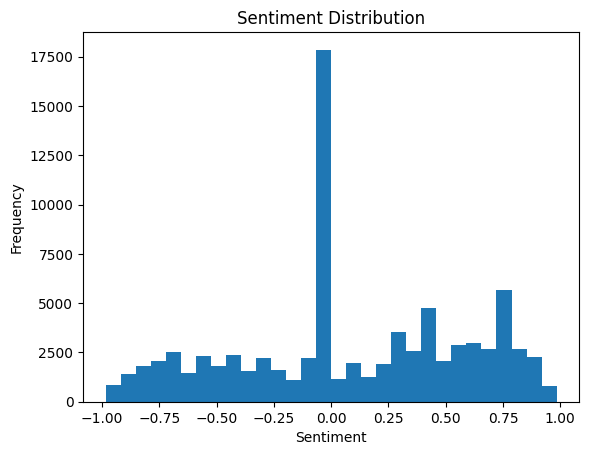

In [189]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming you've already loaded the dataset and named it 'df'

# Data analysis and visualization

# ... (previous code)

# Question 4: Most Common Entities
entities_count = df['entities'].explode().value_counts()[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=entities_count.values, y=entities_count.index)
plt.title('Top 10 Mentioned Entities')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.xticks(rotation=45)
plt.show()

# Question 5: Sentiment Distribution
if not df['sentiment'].empty:
    plt.hist(df['sentiment'], bins=30)
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No sentiment data available.")


In [100]:
import nltk

# Download the 'stopwords' resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

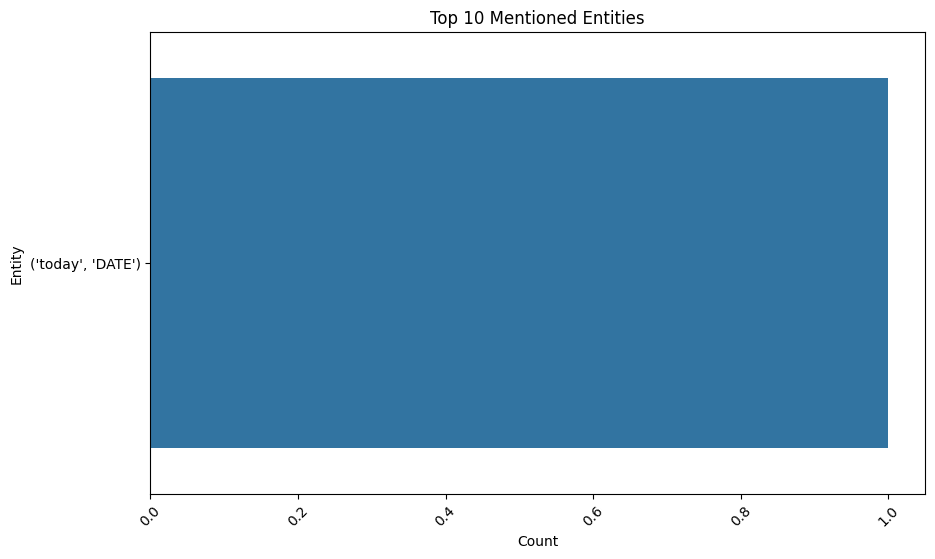

In [255]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming you've already loaded the dataset and named it 'df'

# Data analysis and visualization

# ... (previous code)

# Question 4: Most Common Entities
entities_count = df['entities'].explode().value_counts()[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=entities_count.values, y=entities_count.index)
plt.title('Top 10 Mentioned Entities')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.xticks(rotation=45)
plt.show()


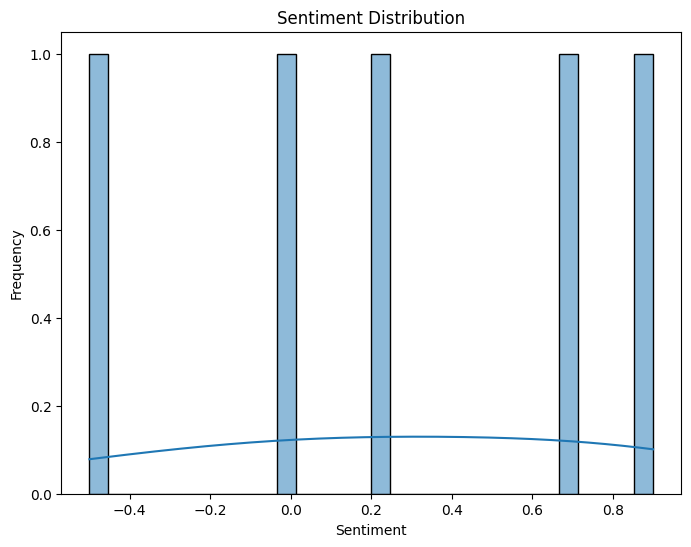

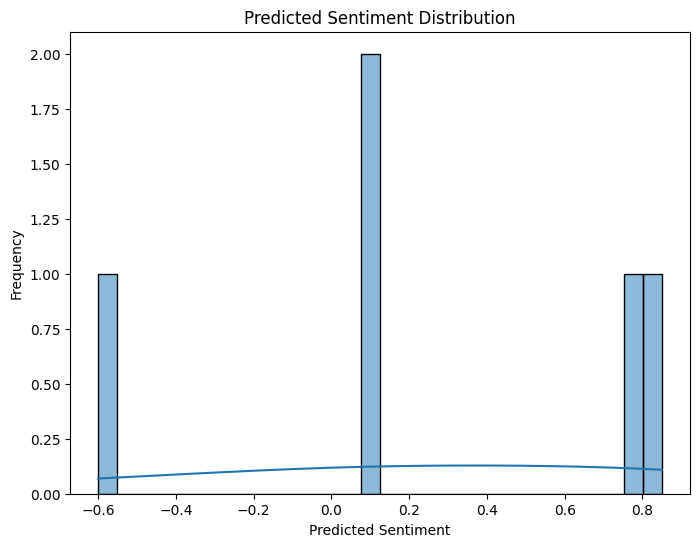

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming you've already loaded the dataset and named it 'df'

# Visualization 2: Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sentiment', bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Predicted Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='predicted_sentiment', bins=30, kde=True)
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Frequency')
plt.show()


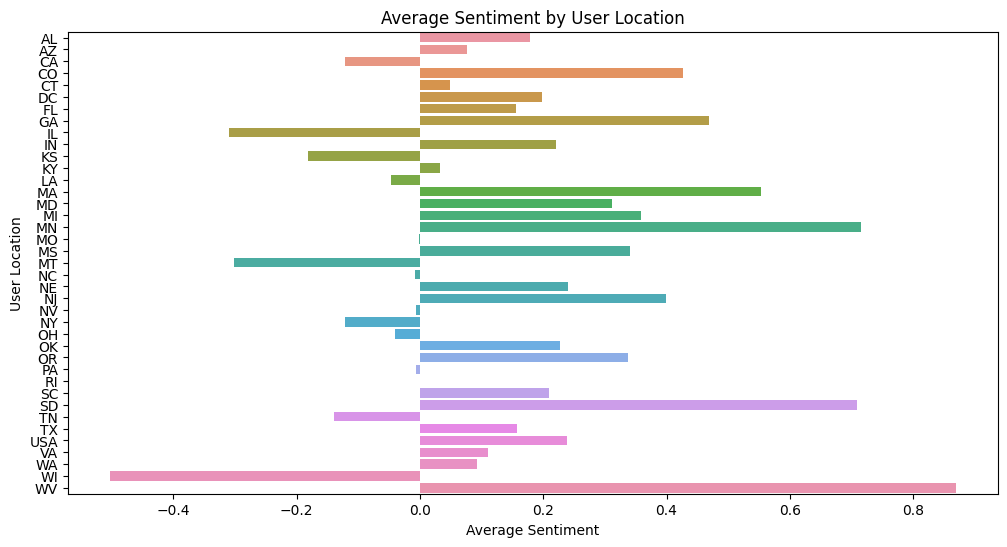

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by user location and calculate average sentiment
location_sentiment = df_location.groupby('user_location')['sentiment'].mean().reset_index()

# Plot a bar chart of average sentiment by user location
plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment', y='user_location', data=location_sentiment)
plt.title('Average Sentiment by User Location')
plt.xlabel('Average Sentiment')
plt.ylabel('User Location')
plt.show()



In [249]:
import plotly.express as px

# Group the data by sentiment and count the occurrences for each category
#sentiment_by_country = df.groupby(['location', 'sentiment'])['tweet_id'].count().reset_index()

# Create treemaps using Plotly Express
treemap_country = px.treemap(sentiment_by_country, path=['user_location', 'sentiment'], values='tweet_id',
                             color='sentiment', color_discrete_map={'negative': 'red', 'neutral': 'blue', 'positive': 'green'},
                             title='Sentiment Distribution by Country')
# Show the treemaps
treemap_country.show()


<Figure size 1000x600 with 0 Axes>

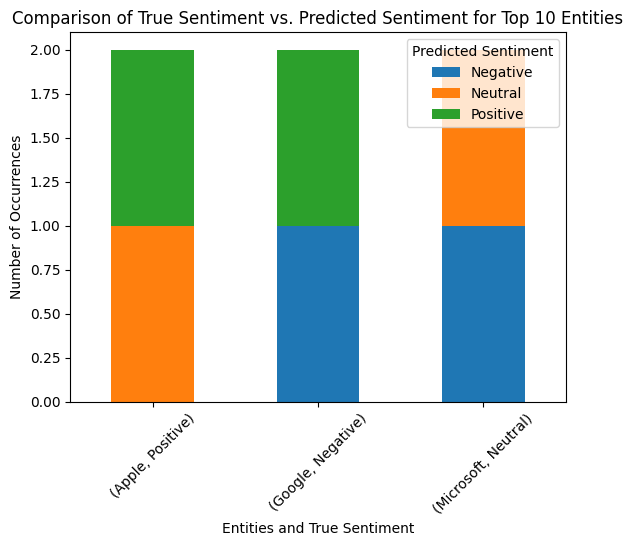

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'true_sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral'],
    'predicted_sentiment': ['Positive', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative'],
    'entity': ['Apple', 'Google', 'Microsoft', 'Apple', 'Google', 'Microsoft'],
}

df = pd.DataFrame(data)

# Group the data by 'entity', 'true sentiment', and 'predicted sentiment' and count occurrences
entity_sentiment_comparison = df.groupby(['entity', 'true_sentiment', 'predicted_sentiment'])['true_sentiment'].count().reset_index(name='count')

# Pivot the data for a stacked bar chart
pivot_entity_sentiment = entity_sentiment_comparison.pivot_table(index=['entity', 'true_sentiment'], columns='predicted_sentiment', values='count', fill_value=0)

# Create a stacked bar chart using seaborn
plt.figure(figsize=(10, 6))
pivot_entity_sentiment.plot(kind='bar', stacked=True)
plt.title('Comparison of True Sentiment vs. Predicted Sentiment for Top 10 Entities')
plt.xlabel('Entities and True Sentiment')
plt.ylabel('Number of Occurrences')
plt.legend(title='Predicted Sentiment')
plt.xticks(rotation=45)
plt.show()
